In [1]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 
!pip install scipy 

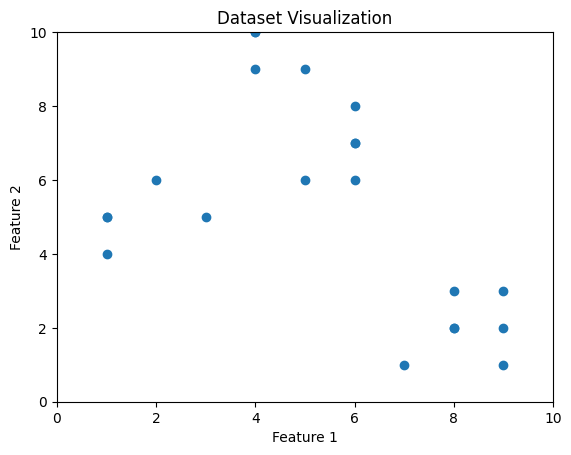

In [2]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7,
               1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.scatter(x1, x2, marker='o')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

building model

In [4]:
distortions=[]
inertias=[]
mapping1={}
mapping2={}
k=range(1,10)

for k in k :
    kmeanModel=KMeans(n_clusters=k,random_state=42).fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)/X.shape[0]))
    inertias.append(kmeanModel.inertia_)
    mapping1[k]=distortions[-1]
    mapping2[k]=distortions[-1]


tabuloating and visualizing results 

In [ ]:
print("Distortion values:")